# Optional dataset 4
--------------------

I've choosen iris dataset, because is perfect for classification algorithms. It contains information about petals and sepals length and width. Thanks for this information I can predict class of iris. Dataset contains 3 classes: setosa, versicolor, virginic. 

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


Here, I download iris dataset nad prepare name of columns. I display first 5 records of this data set.

In [149]:

df = pd.read_csv('iris.data')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Below, I use info to check how many not null columns I have.

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


From this, I know my dataset is full.

Then, I made basic computation for example mean or std.

In [151]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizing 

Here I prepared some plots to visualize relation between all class and know data.

Heatmap shows correlation between columns. The brightest colors shows the higher correlation.

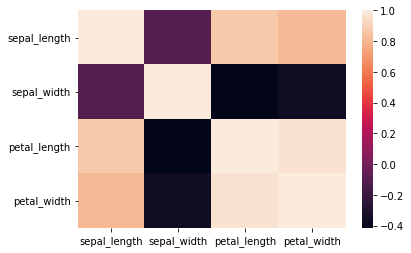

In [152]:
sns.heatmap(df.corr())

I can see from plot that a lot of data in dataset is correlated positive so they will be useful in analyzes.

## Scalling data

I have scaled data, because models better work on data in the same scale. Now in each column apart from class column I have numerical variables between 0 and 1.

In [153]:

data = df.select_dtypes(np.number)
df[data.columns] = MinMaxScaler().fit_transform(data)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.166667,0.416667,0.067797,0.041667,Iris-setosa
1,0.111111,0.500000,0.050847,0.041667,Iris-setosa
2,0.083333,0.458333,0.084746,0.041667,Iris-setosa
3,0.194444,0.666667,0.067797,0.041667,Iris-setosa
4,0.305556,0.791667,0.118644,0.125000,Iris-setosa
...,...,...,...,...,...
144,0.666667,0.416667,0.711864,0.916667,Iris-virginica
145,0.555556,0.208333,0.677966,0.750000,Iris-virginica
146,0.611111,0.416667,0.711864,0.791667,Iris-virginica
147,0.527778,0.583333,0.745763,0.916667,Iris-virginica


Then, I create huge plot which shows all data in dataset and their dependecies from other data. Different colors on each graph mean different class of iris. 

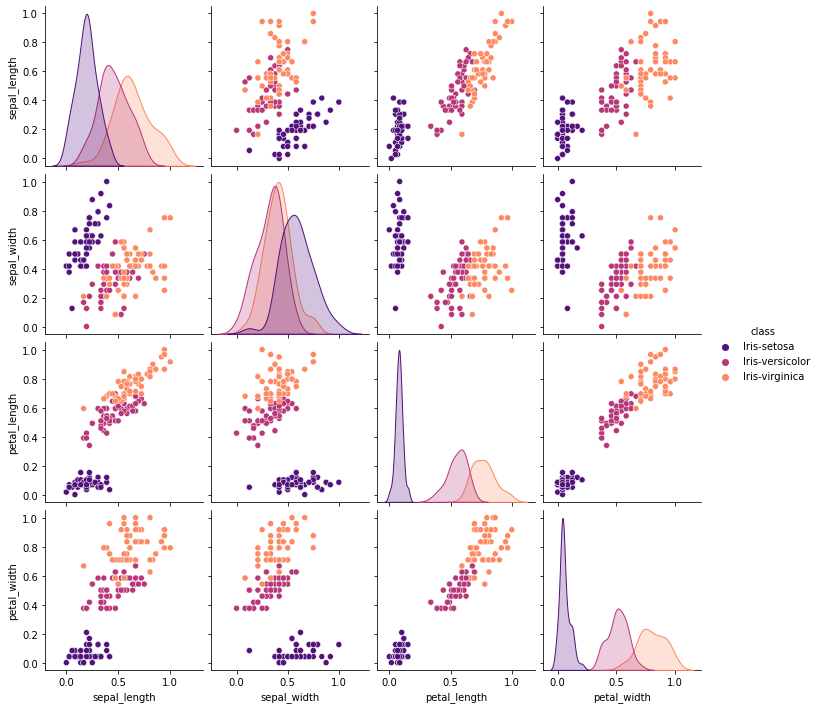

In [154]:
sns.pairplot(data=df,hue='class',palette='magma')

## Spliting dataset

I split data in two subset train and test set to fit my models.

In [155]:
train_X, test_X, train_y,test_y= train_test_split(df.iloc[:,0:4],df.iloc[:,4], train_size=0.7)

#Some ML models for classification.

Below I want to prepare some method of classification and chose the best for this dataset.

Method:


*   Logistic Regression
*   Decission Tree
*   Random Forest
*   Suport Vector Machine (SVM)



## Logistic Regression


I use logistic regression because is properly for classification problem. I create logistic regression model for multiclass problem and train my model to predict species of iris.

In [156]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# Here I fit model to be able to predict species based on petals and sepals.
lr_model = lr.fit(train_X,train_y)

Below I predict species of iris using created model.

In [157]:
lr_predictions = lr_model.predict(test_X)

I want to display information about accuracy of my logistic regresion model. So, I use classification report.

In [158]:
print(classification_report(test_y,lr_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.91      0.71      0.80        14
 Iris-virginica       0.80      0.94      0.86        17

       accuracy                           0.89        45
      macro avg       0.90      0.89      0.89        45
   weighted avg       0.90      0.89      0.89        45



### Accuracy

In [159]:
lr_accuracy = accuracy_score(lr_predictions,test_y)
print(lr_accuracy)

0.8888888888888888


## Decision Tree

A decision tree is a graph like tree, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 



I initialize the classifier. At the end I fit the classifier to the training set.

In [160]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(train_X, train_y)

### Visualization created decision tree

Created model can prepared vary decision trees. Below, I can see example of it.

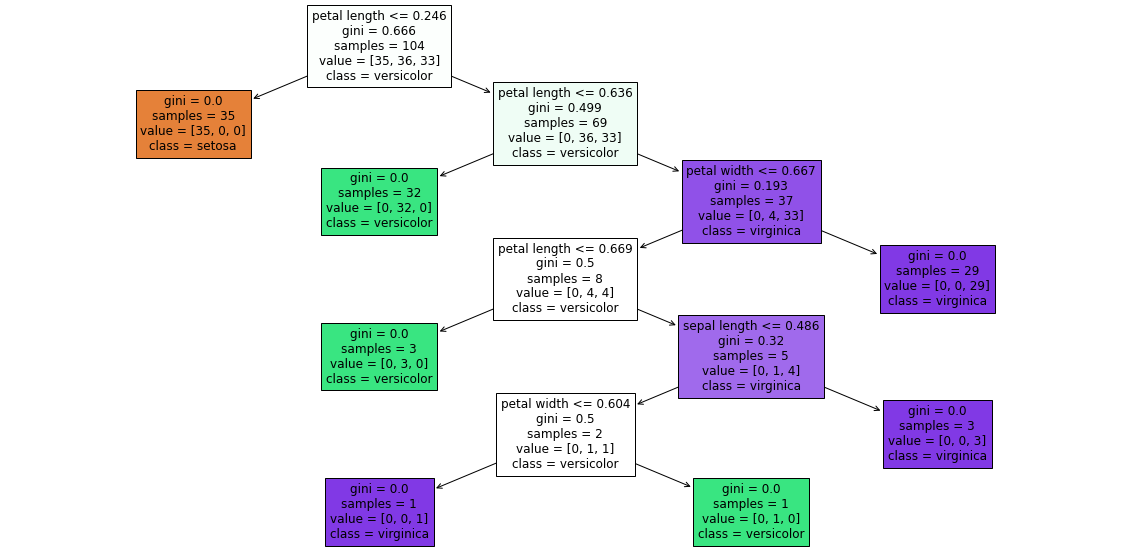

In [161]:
from sklearn import tree
import graphviz

fn=['sepal length','sepal width','petal length','petal width']
cn=['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

This tree pressents decision yes or not making step by step to classify all data in data set.
I describe node on the right of root.

* petal legth <= 0.636 means that data set is splited by this conditions in two subset

* gini = 0.499 gini index is a score that evaluates how accurate a split is among the classified groups; I want to have it as small as possible

* samples = 69 is number of data which remain in set and should be splited into smaller subset

* value = [0,36,33] is number of samples of each species from set which remain to classify

* class=versicolor it means that this class dominate in remaining dataset 





Prediction of species.

In [162]:
dt_predictions = dt.predict(test_X)

Here, I count accuracy and some different metrics to check how good is my model.

In [163]:
print(classification_report(test_y,dt_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      0.86      0.89        14
 Iris-virginica       0.89      0.94      0.91        17

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



### Accuracy

In [164]:
dt_accuracy = accuracy_score(dt_predictions,test_y)
print(dt_accuracy)

0.9333333333333333


Then, I want to check how change accuracy when I change maximal depth of tree.

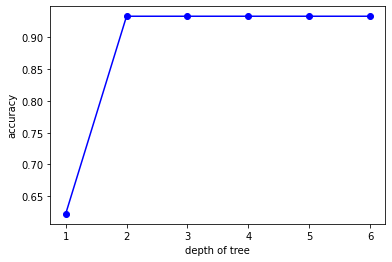

In [165]:
# List of values to try for max_depth:
max_depth_range = [1,2,3,4,5,6]
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(train_X, train_y)
    score = clf.score(test_X, test_y)
    accuracy.append(score)


plt.plot(max_depth_range,accuracy, "-o", color='blue')
plt.xlabel("depth of tree")
plt.ylabel("accuracy")
plt.show()

From plot I can see that tree with depth equal 2 is enough and I don't need more depth. It's also important because when I stop creating decision tree earlier I protect model against overfitting.   

## Random Forest
It is an ensemble method, meaning that a random forest model is made up of a large number of small decision trees called estimators which each produce their own predictions. The random forest model combines the predictions of the estimators to produce a more accurate prediction.

In [166]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)

rf_model = rfc.fit(train_X,train_y)
rf_predictions = rf_model.predict(test_X)

print(classification_report(test_y,rf_predictions))

rf_accuracy = accuracy_score(rf_predictions,test_y)
print(rf_accuracy)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      0.86      0.89        14
 Iris-virginica       0.89      0.94      0.91        17

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45

0.9333333333333333


Below, I plot 5 trees from generated forest.

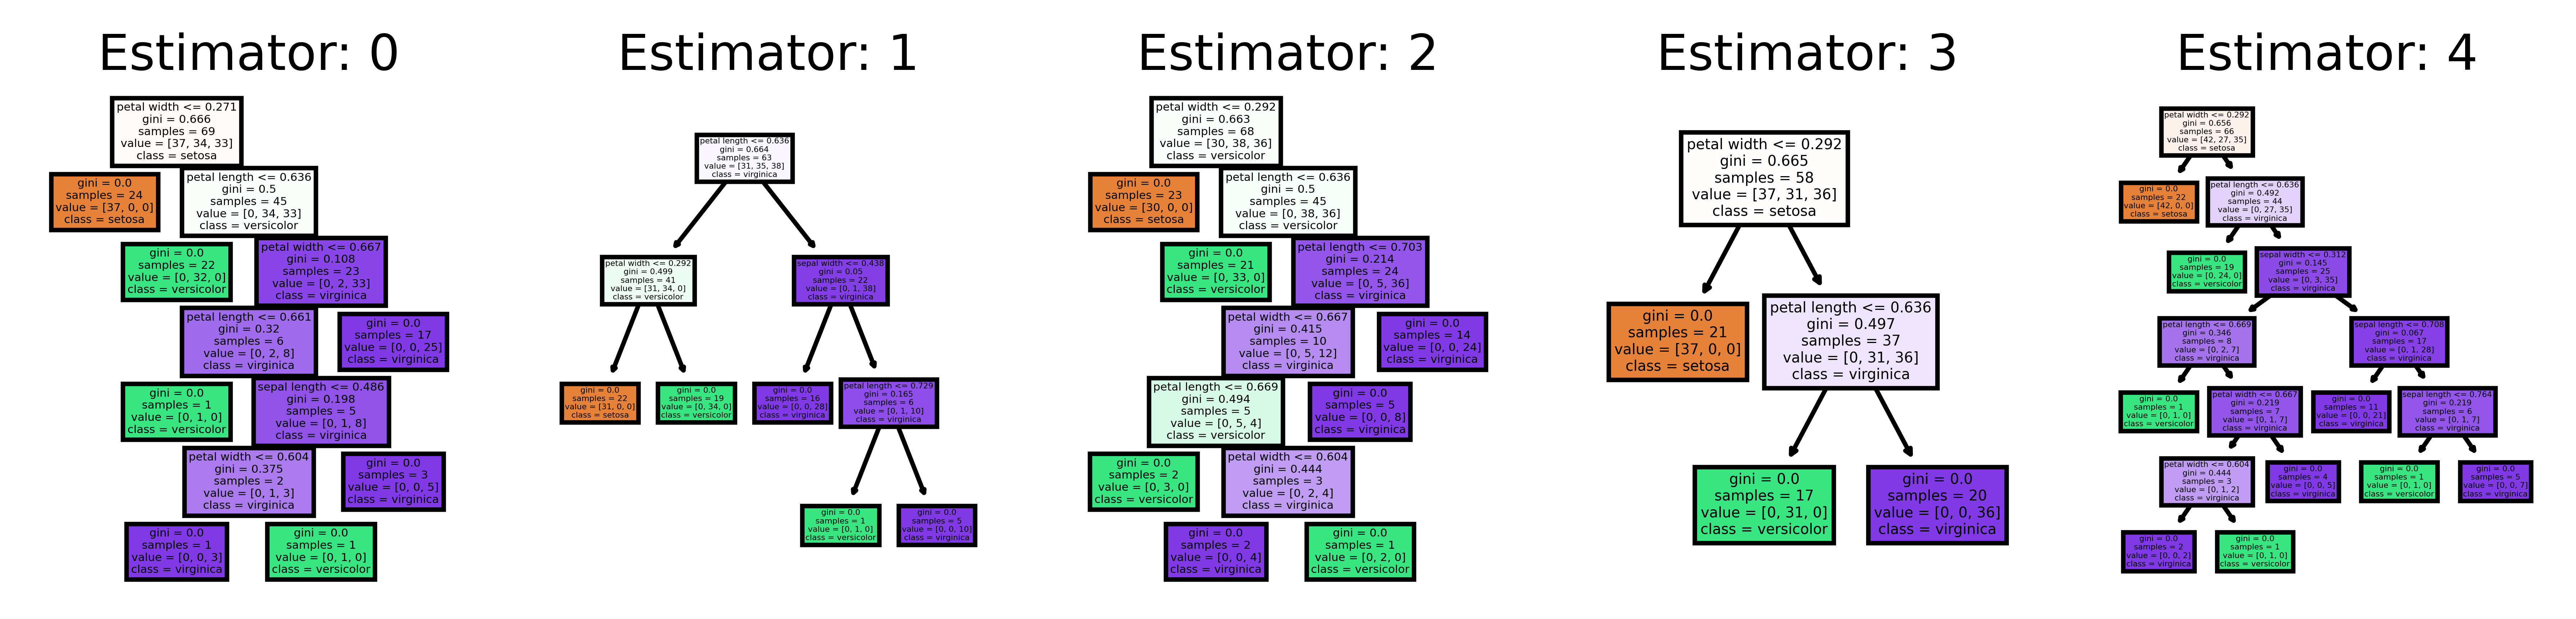

In [167]:

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0,5):
    tree.plot_tree(rf_model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

They vary between each other. Main difference is depth and number of nodes. Some trees classify data faster than other.

## Support Vector Machine (SVM)

It is a linear model for classification problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is creates a line or a hyperplane which separates the data into classes.

In [168]:
from sklearn.svm import SVC
svc = SVC()

svc_model = svc.fit(train_X,train_y)
svc_predictions = svc_model.predict(test_X)

print(classification_report(test_y,svc_predictions))

svc_accuracy = accuracy_score(svc_predictions,test_y)
print(svc_accuracy)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.89      1.00      0.94        17

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.96        45
   weighted avg       0.96      0.96      0.96        45

0.9555555555555556


## Conclusion

In [169]:
method = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracy = [lr_accuracy, dt_accuracy, rf_accuracy, svc_accuracy]

data = pd.DataFrame({'Method':method, 'Accuracy':accuracy})
data

,Method,Accuracy
0,Logistic Regression,0.888889
1,Decision Tree,0.933333
2,Random Forest,0.933333
3,SVM,0.955556



I can see that the best result I achive using SVM. Also methods with decision tree have high accuracy. The worst from them is logistic regression but its accuracy is also well.  

